In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
# configure matplotlib to output inline
%matplotlib inline


In [2]:
# Load the data from flat files 
MFI=pd.read_csv('Data file.csv')
MFI

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
# Drop unused column
MFI.drop(['Unnamed: 0'], axis=1,inplace=True)

In [4]:
# Check Null values 
MFI.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [5]:
# describe the data frame 
MFI.describe()
# By describing the data frame we got the negative values in few attributes 

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [6]:
MFI.dtypes
# find the data types 

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [7]:
# Grab the negative values with attributes 
NonRealValues=[]
for cols in MFI.columns :
    if MFI[cols].dtype != object : 
        if  MFI[cols].min()<0 :
            NonRealValues.append(cols)
            print(cols + ' '+ str(MFI[cols].min()))


aon -48.0
daily_decr30 -93.0126666666667
daily_decr90 -93.0126666666667
rental30 -23737.14
rental90 -24720.58
last_rech_date_ma -29.0
last_rech_date_da -29.0
medianmarechprebal30 -200.0
medianmarechprebal90 -200.0


In [8]:
# Replace negative values with mean
for cols in NonRealValues :
#     print(hrds.loc[hrds[cols] > 0, cols])
    MFI.loc[MFI[cols] < 0, cols] = MFI[cols].astype(float).mean()

In [9]:
# negative values with mean
MFI.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8172.143417,5428.634011,6135.898491,2776.280556,3594.990997,3779.551253,3712.451821,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75692.841922,9206.704772,10903.798735,4275.737112,5729.602733,53905.056374,53374.824741,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,252.000000,45.500000,45.792000,329.980000,380.130000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,537.000000,1575.168000,1607.000000,1218.580000,1524.530000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,1000.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [10]:
MFI['pcircle'].unique()

array(['UPW'], dtype=object)

In [11]:
# Get the year from date
MFI['pdate']= pd.to_datetime(MFI['pdate']).dt.year

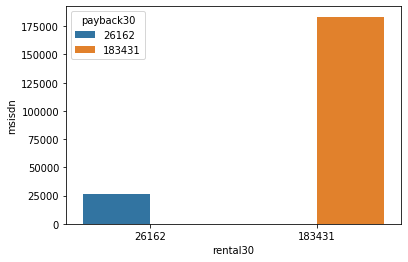

In [12]:
# Group by 'label'
MFI_label = pd.DataFrame(MFI).groupby(["label"], as_index=False)["rental30","rental90","payback30","payback90","msisdn"].count()
# MFI_label.plot.bar()
sns.barplot(x="rental30", y="msisdn",hue="payback30",data=MFI_label)


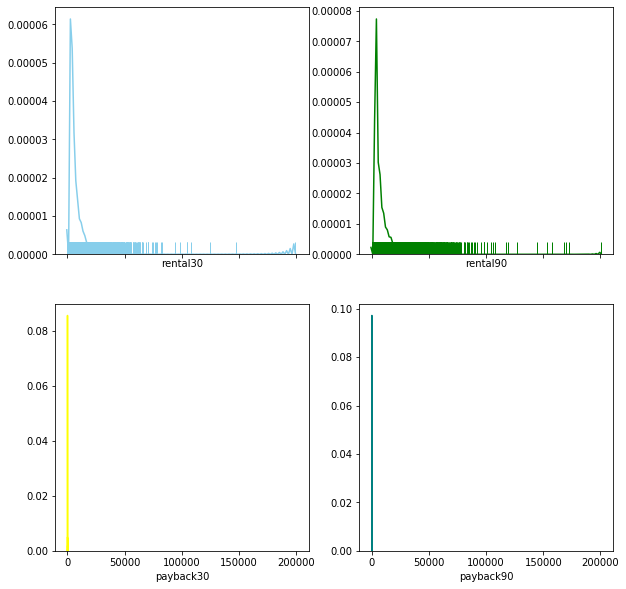

In [13]:
f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)

sns.distplot(MFI['rental30'],hist=False, color="skyblue", rug=True,ax=axes[0, 0])
sns.distplot(MFI['rental90'],hist=False, color="green" , rug=True,ax=axes[0, 1])
sns.distplot(MFI['payback30'],hist=False, color="yellow", rug=True,ax=axes[1, 0])
sns.distplot(MFI['payback90'],hist=False, color="teal", rug=True,ax=axes[1, 1])

In [14]:
# Label Encoding for MFI
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
MFI['pcircle'] = labelencoder.fit_transform(MFI['pcircle'])
MFI['msisdn'] = labelencoder.fit_transform(MFI['msisdn'])

In [15]:
MFI['pcircle'].unique()

array([0])

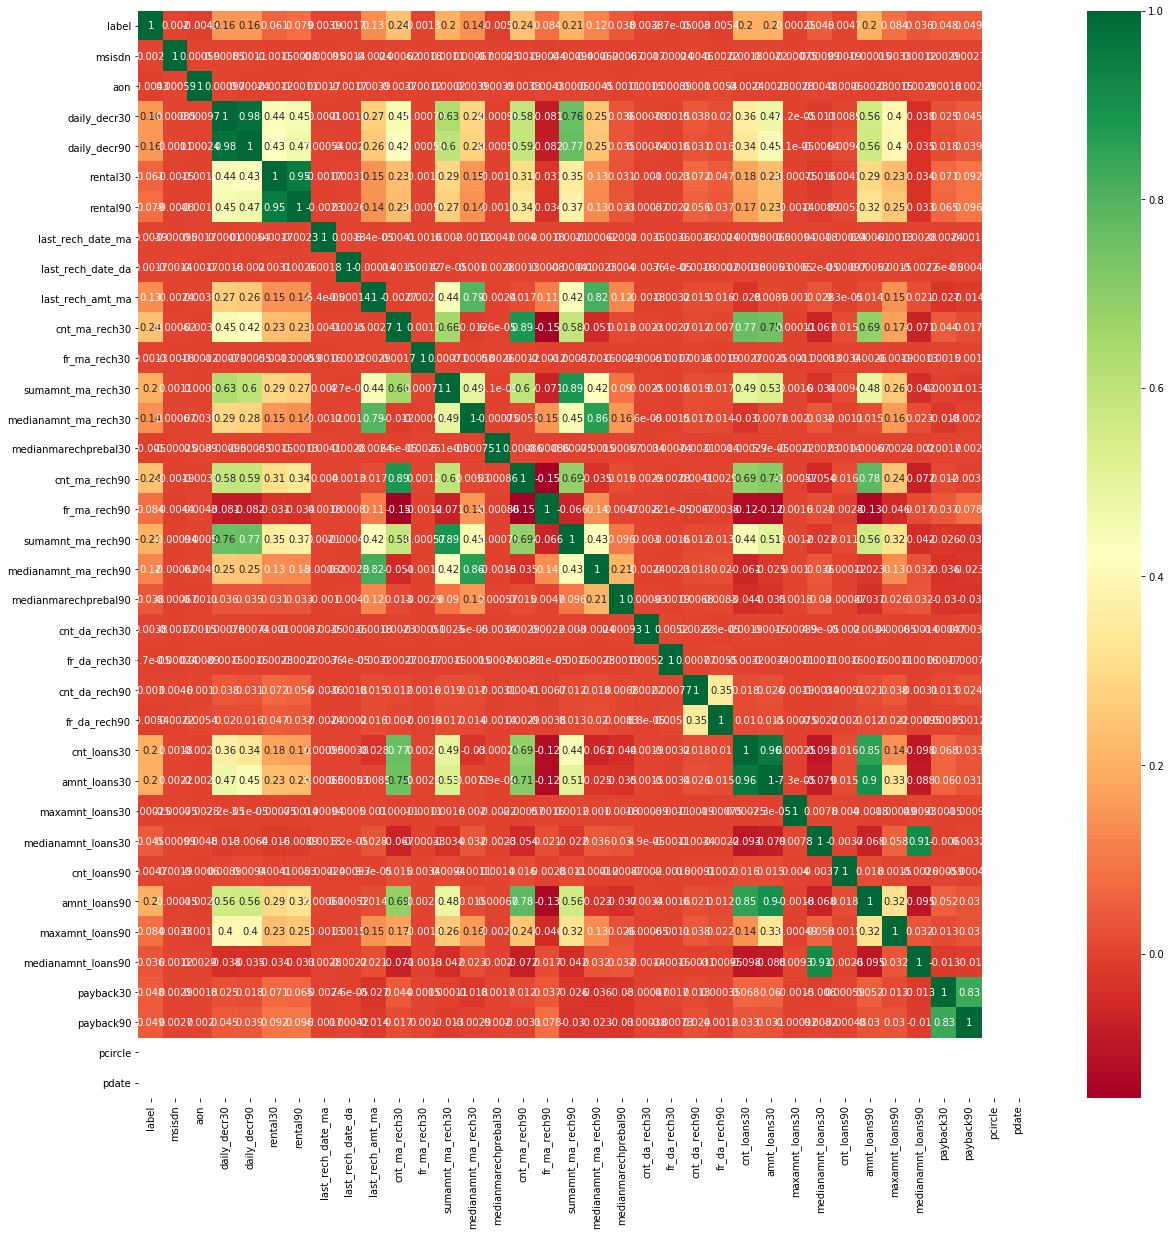

In [16]:
# Correlation using heatMap
plt.figure(figsize=(20,20))
sns.heatmap(data=MFI.corr(),annot=True,cmap="RdYlGn")

In [17]:
MFI.keys()

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

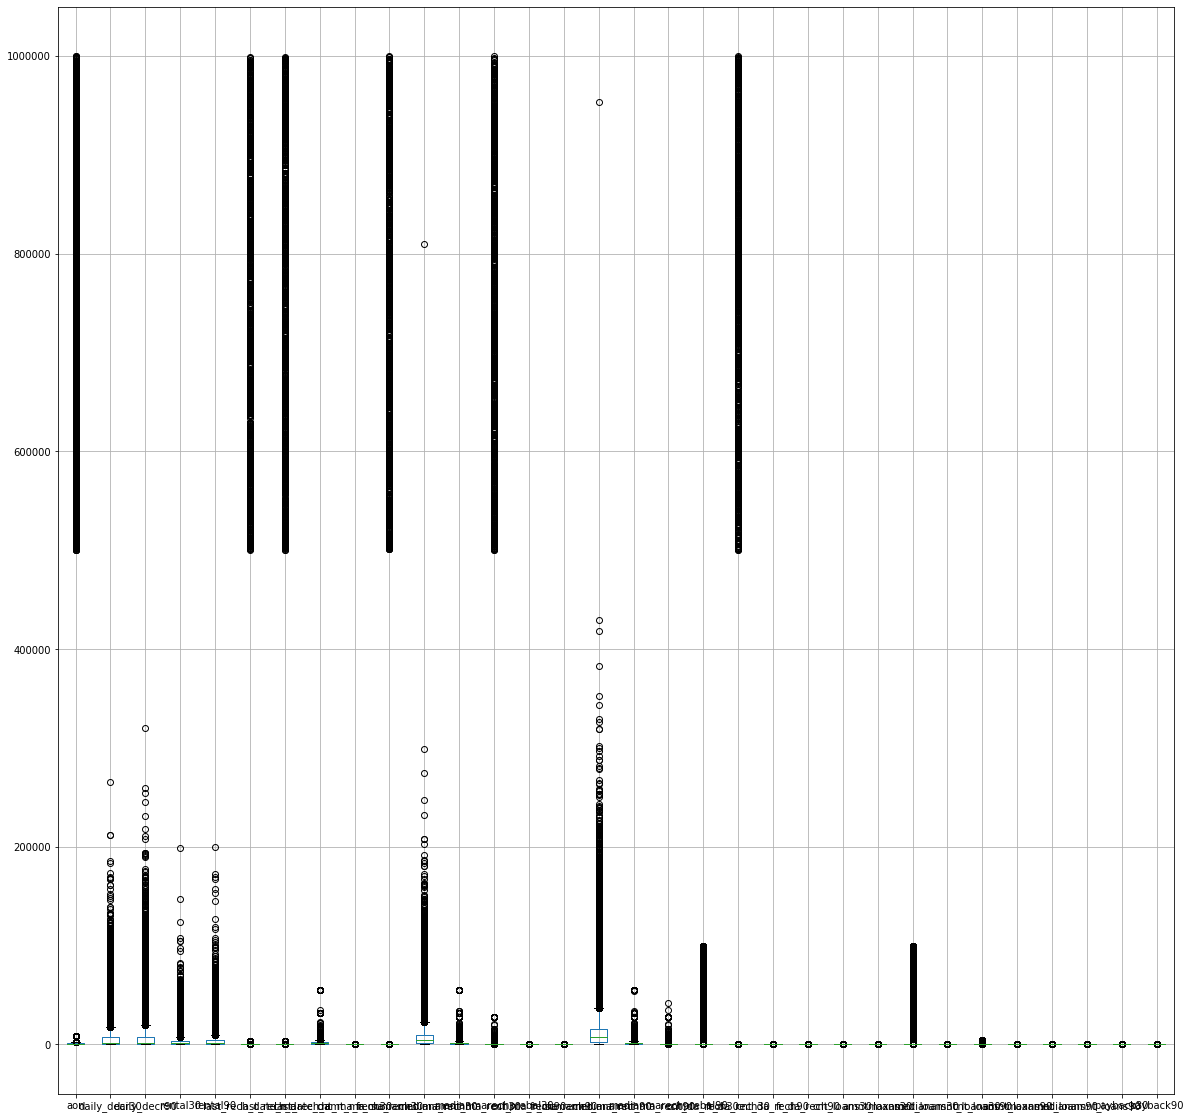

In [18]:
# Outliers using boxplot 
plt.figure(figsize=(20,20))
MFI[['aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']].boxplot()

In [19]:
# IQR score technique to remove Outliers 
Q1 = MFI.quantile(0.25)
Q3 = MFI.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
dfIQR = MFI[~((MFI < (Q1-1.5 * IQR)) |(MFI > (Q3 + 1.5 * IQR))).any(axis=1)]
dfIQR.shape

# Using IQR we are loosing more than 50% data


(36,)


(56190, 36)

In [20]:
# Lets Check Outliers in the Dataset 
from scipy.stats import zscore
z_score=abs(zscore(MFI))
print(MFI.shape)
dataz=MFI.iloc[(z_score<3).all(axis=1)]
print(dataz.shape)

(209593, 36)
(0, 36)


In [21]:
# define X,Y  and it's Shape
x=MFI.drop('label',axis=1)
x

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,0,2016
1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,0,2016
2,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,0,2016
3,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,0,2016
4,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,42866,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,0,2016
209589,178248,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,0,2016
209590,53995,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,0,2016
209591,111388,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,0,2016


In [22]:
y=MFI['label']
y=np.array(y).reshape(-1,1)

In [23]:
print(x.shape)
print(y.shape)

(209593, 35)
(209593, 1)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
x.shape

(209593, 35)

In [25]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42


In [26]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

# Define Classification Model

In [27]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)


from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
Rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)
SGD=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [28]:
models=[]
models.append(("KNeighborsClassifier",KNN))
# models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("SGDClassifier",SGD))
# models.append(("RandomForestClassifier",Rf))


*********** KNeighborsClassifier ************


max r2 score corresponding to 0  is  0


random state value = 0
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.8627876211749907


Cross_Val_Score= 0.862328414027972


roc_auc_score= 0.628288481793236


classification_report
               precision    recall  f1-score   support

           0       0.44      0.31      0.37      5820
           1       0.90      0.94      0.92     40291

   micro avg       0.86      0.86      0.86     46111
   macro avg       0.67      0.63      0.64     46111
weighted avg       0.85      0.86      0.85     46111



[[ 1831  3989]
 [ 2338 37953]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** LogisticRegression ************


max r2 score corresponding to 0  is  0


random state value = 0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_interce

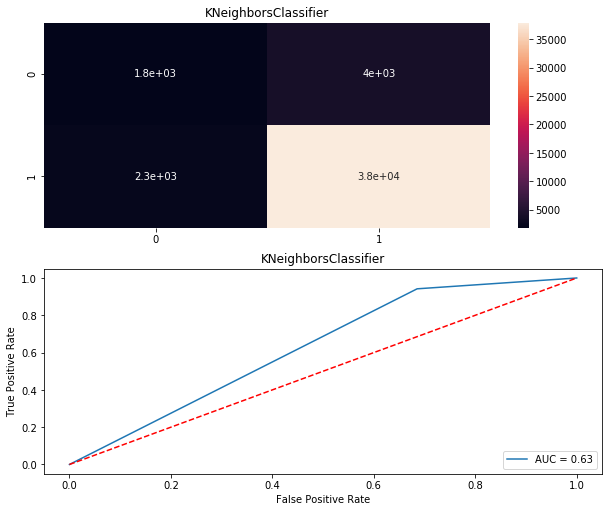

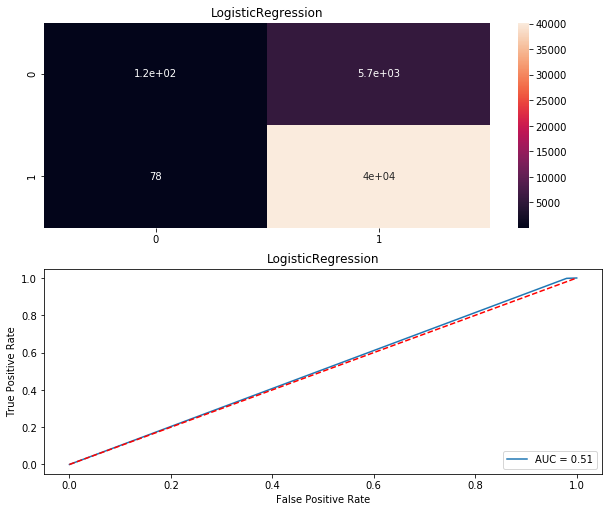

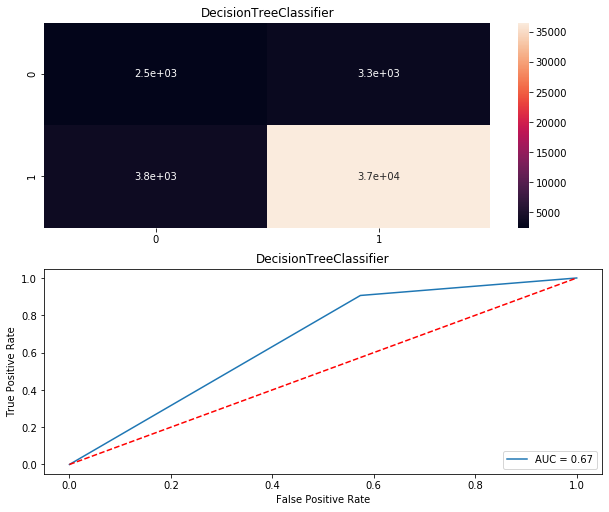

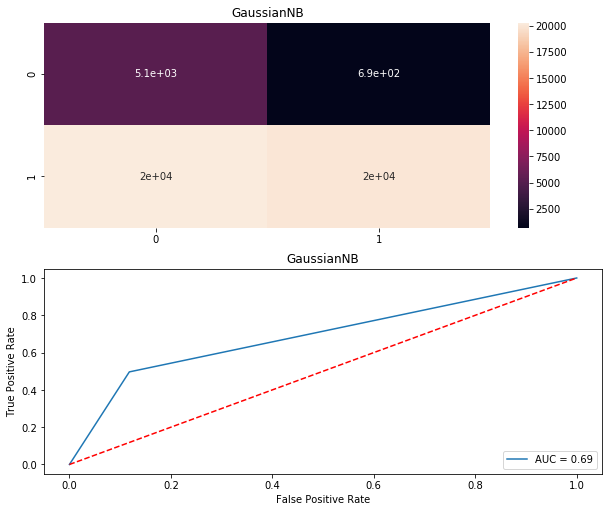

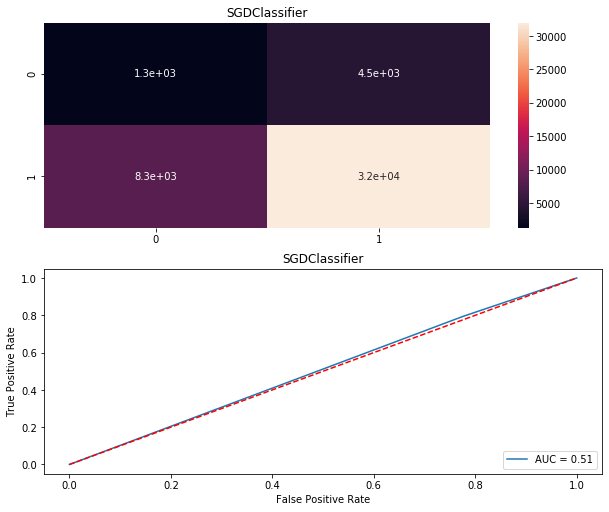

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [42]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs,'ROC_Auc_Curve':rocscore})
result

,Model,Accuracy_score,Cross_val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,86.278762,86.232841,62.828848
1,LogisticRegression,87.460693,85.219893,50.899768
2,DecisionTreeClassifier,84.574180,84.876406,66.638355
3,GaussianNB,54.509770,54.190749,68.919859
4,SGDClassifier,72.212704,54.139575,50.913755


In [43]:

from sklearn.ensemble import AdaBoostClassifier
LR=LogisticRegression()
ad=AdaBoostClassifier(n_estimators=50,base_estimator=LR,algorithm='SAMME')
ad.fit(train_x,train_y)
ad_pred=ad.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.7932814295938062
[[ 3828  1997]
 [ 7535 32751]]
              precision    recall  f1-score   support

           0       0.34      0.66      0.45      5825
           1       0.94      0.81      0.87     40286

   micro avg       0.79      0.79      0.79     46111
   macro avg       0.64      0.74      0.66     46111
weighted avg       0.87      0.79      0.82     46111



In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_x,train_y)
ad_pred=gb.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.8896141918414261
[[ 1296  4529]
 [  561 39725]]
              precision    recall  f1-score   support

           0       0.70      0.22      0.34      5825
           1       0.90      0.99      0.94     40286

   micro avg       0.89      0.89      0.89     46111
   macro avg       0.80      0.60      0.64     46111
weighted avg       0.87      0.89      0.86     46111



In [45]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(train_x,train_y)
predrf=rf.predict(test_x)

print(predrf)
print(accuracy_score(test_y,predrf))
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

[1 1 1 ... 1 1 1]
0.8993081911040749
[[ 2114  3711]
 [  932 39354]]
              precision    recall  f1-score   support

           0       0.69      0.36      0.48      5825
           1       0.91      0.98      0.94     40286

   micro avg       0.90      0.90      0.90     46111
   macro avg       0.80      0.67      0.71     46111
weighted avg       0.89      0.90      0.89     46111



In [46]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(train_x,train_y)
predrf=rf.predict(test_x)

print(predrf)
print(accuracy_score(test_y,predrf))
print(confusion_matrix(test_y,predrf))
print(classification_report(test_y,predrf))

[1 1 1 ... 1 1 1]
0.8993081911040749
[[ 2114  3711]
 [  932 39354]]
              precision    recall  f1-score   support

           0       0.69      0.36      0.48      5825
           1       0.91      0.98      0.94     40286

   micro avg       0.90      0.90      0.90     46111
   macro avg       0.80      0.67      0.71     46111
weighted avg       0.89      0.90      0.89     46111



In [47]:
# Saving the RandomForestClassifier Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(rf,'MFI_Rf_Model.obj')
OuModel=joblib.load('MFI_Rf_Model.obj')
